In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
from pandas import DataFrame
import pylab as pl
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r"C:\Users\isman\Downloads\petrol_consumption.csv")
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
print(df.shape)
df.info()

(48, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [4]:
pd.options.display.float_format = '{:.4f}'.format
data_summary = df.describe()
data_summary.T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0000,7.6683,0.9508,5.0000,7.0000,7.5000,8.1250,10.0000
Average_income,48.0000,4241.8333,573.6238,3063.0000,3739.0000,4298.0000,4578.7500,5342.0000
Paved_Highways,48.0000,5565.4167,3491.5072,431.0000,3110.2500,4735.5000,7156.0000,17782.0000
Population_Driver_licence(%),48.0000,0.5703,0.0555,0.4510,0.5298,0.5645,0.5952,0.7240
Petrol_Consumption,48.0000,576.7708,111.8858,344.0000,509.5000,568.5000,632.7500,968.0000


In [5]:
for k, v in df.items():
    q1=v.quantile(0.25)
    q3=v.quantile(0.75)
    irq=q3-q1
    v_col=v[(v<=q1-1.5*irq) | (v>=q3+1.5*irq)]
    perc=np.shape(v_col)[0]*100.0/np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))


Column Petrol_tax outliers = 4.17%
Column Average_income outliers = 0.00%
Column Paved_Highways outliers = 4.17%
Column Population_Driver_licence(%) outliers = 2.08%
Column Petrol_Consumption outliers = 4.17%


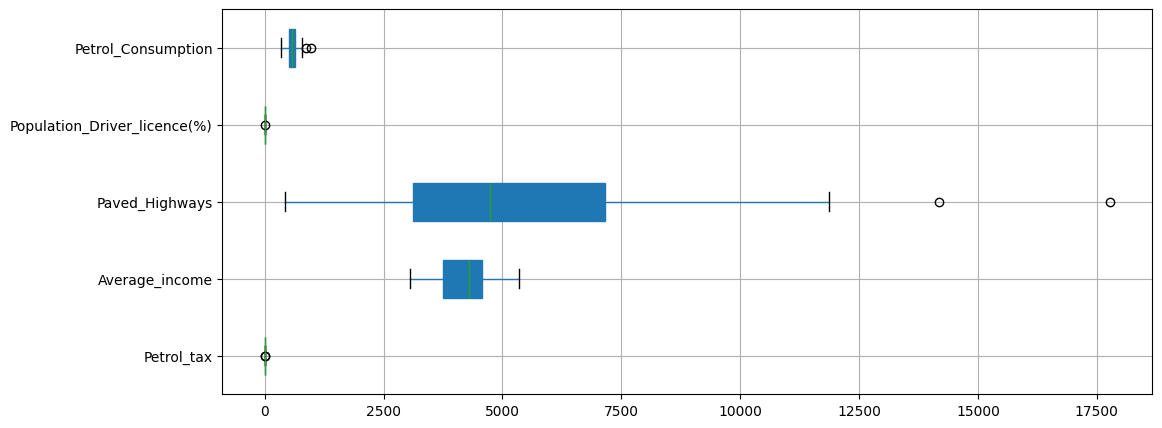

In [6]:

plt.figure(figsize=(12,5))
df.boxplot(patch_artist=True,vert=False)
plt.show()



In [7]:
my_corr=df.corr()
my_corr

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.0000,0.0127,-0.5221,-0.2880,-0.4513
Average_income,0.0127,1.0000,0.0502,0.1571,-0.2449
Paved_Highways,-0.5221,0.0502,1.0000,-0.0641,0.0190
Population_Driver_licence(%),-0.2880,0.1571,-0.0641,1.0000,0.6990
Petrol_Consumption,-0.4513,-0.2449,0.0190,0.6990,1.0000


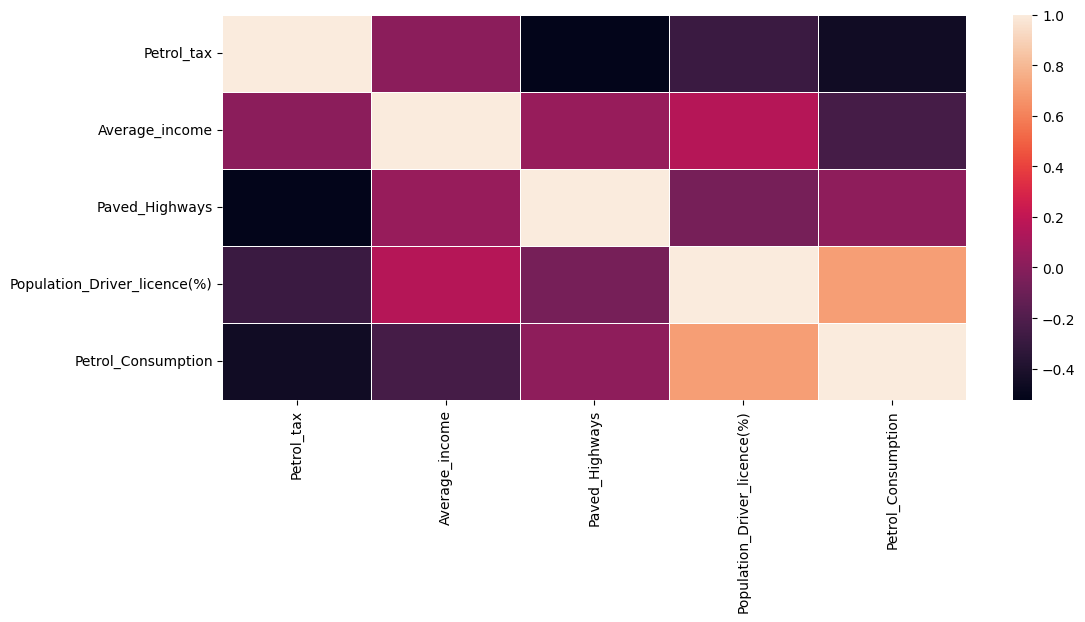

In [8]:
plt.figure(figsize=(12,5))
sns.heatmap(my_corr,linewidth=0.5)
plt.show()

The Pearson Correlation Coefficient of Petrol_tax is -0.45128027518698666  with a P-value of P = 0.0012848906734289314
(0.0, 999.2)


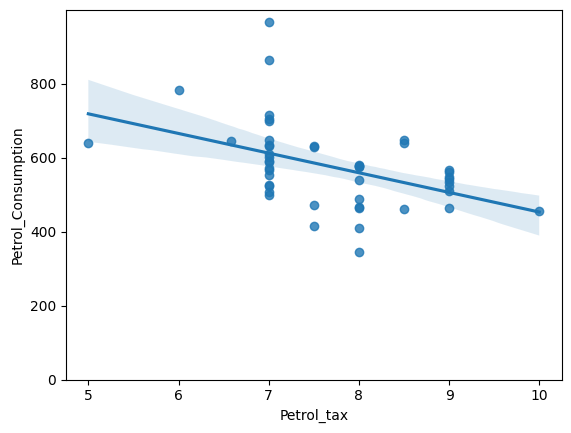

In [9]:
pearson_coef, p_value = stats.pearsonr(df['Petrol_tax'], df['Petrol_Consumption'])
print("The Pearson Correlation Coefficient of Petrol_tax is", pearson_coef, " with a P-value of P =", p_value)  
sns.regplot(x="Petrol_tax", y="Petrol_Consumption", data=df)
print(plt.ylim(0,))
plt.show()

The Pearson Correlation Coefficient of Petrol_tax is -0.24486207498269907  with a P-value of P = 0.09346842977474587


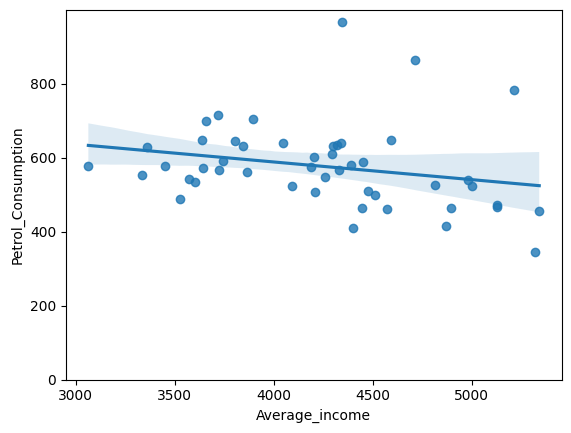

In [10]:
pearson_coef, p_value = stats.pearsonr(df['Average_income'], df['Petrol_Consumption'])
print("The Pearson Correlation Coefficient of Petrol_tax is", pearson_coef, " with a P-value of P =", p_value)  
sns.regplot(x="Average_income", y="Petrol_Consumption", data=df)
plt.ylim(0,)
plt.show()


The Pearson Correlation Coefficient of Petrol_tax is 0.019041938819585786  with a P-value of P = 0.897784600249638


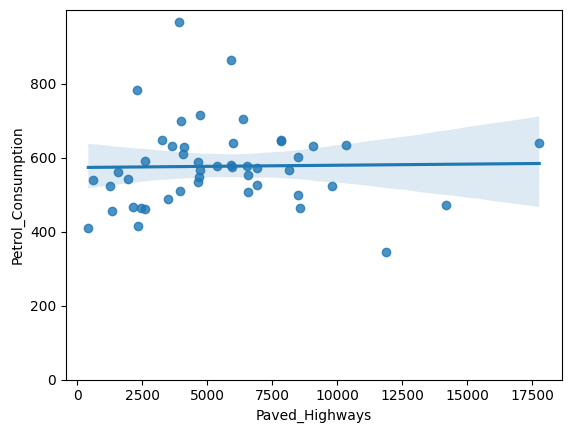

In [11]:
pearson_coef, p_value = stats.pearsonr(df['Paved_Highways'], df['Petrol_Consumption'])
print("The Pearson Correlation Coefficient of Petrol_tax is", pearson_coef, " with a P-value of P =", p_value)  
sns.regplot(x="Paved_Highways", y="Petrol_Consumption", data=df)
plt.ylim(0,)
plt.show()

The Pearson Correlation Coefficient of Petrol_tax is 0.6989654213627079  with a P-value of P = 3.289604948530783e-08


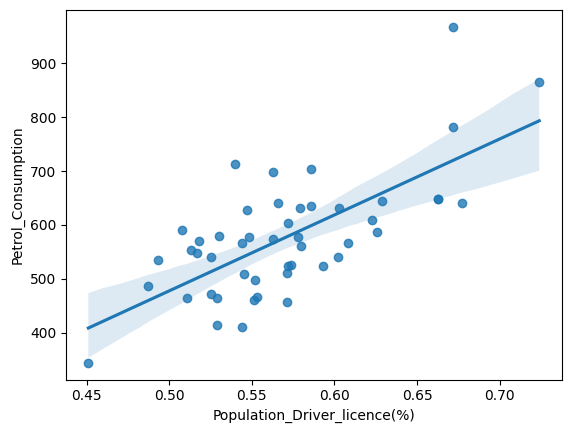

In [12]:
pearson_coef, p_value = stats.pearsonr(df['Population_Driver_licence(%)'], df['Petrol_Consumption'])
print("The Pearson Correlation Coefficient of Petrol_tax is", pearson_coef, " with a P-value of P =", p_value)  
sns.regplot(x="Population_Driver_licence(%)", y="Petrol_Consumption", data=df)
plt.show()

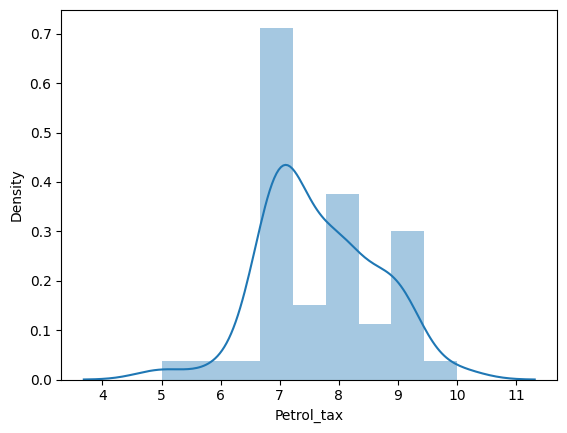

In [13]:

sns.distplot(df['Petrol_tax'])
plt.show()

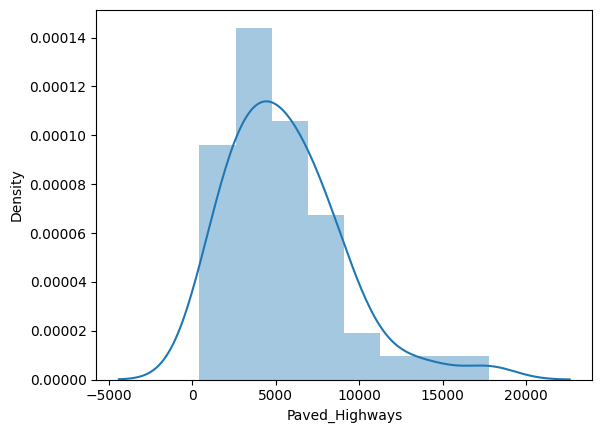

In [14]:
sns.distplot(df['Paved_Highways'])
plt.show()

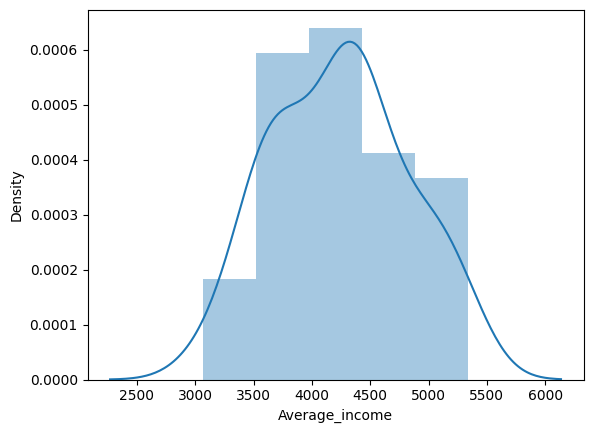

In [15]:
sns.distplot(df['Average_income'])
plt.show()

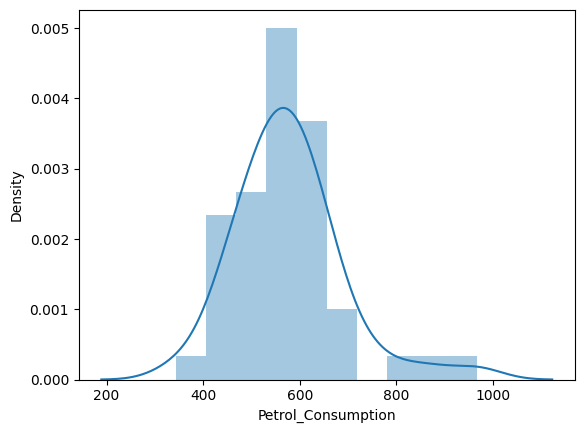

In [16]:
sns.distplot(df['Petrol_Consumption'])
plt.show()

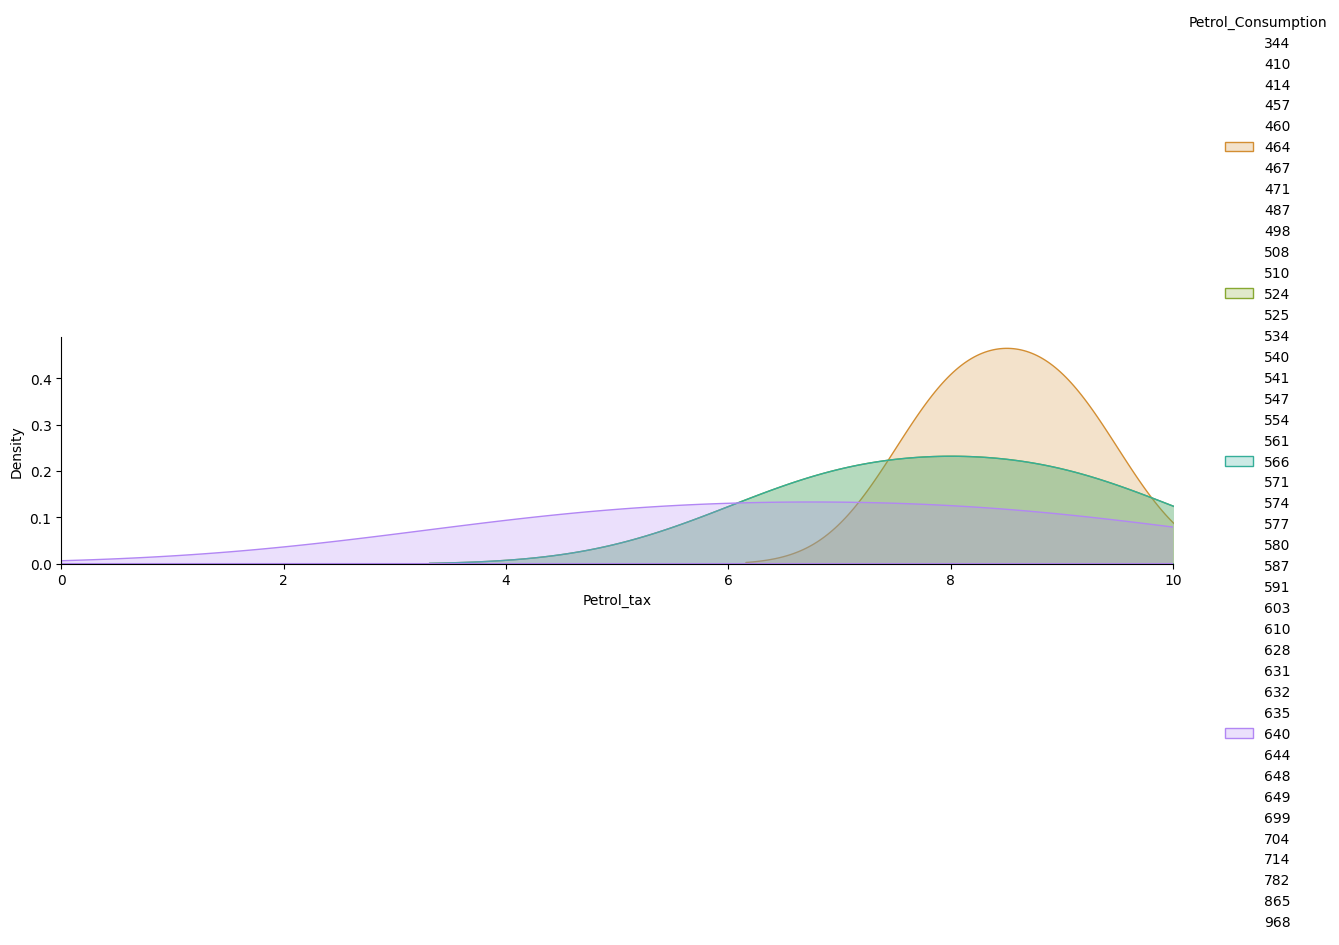

In [17]:
a = sns.FacetGrid(df, hue = 'Petrol_Consumption', aspect=4 )
a.map(sns.kdeplot, 'Petrol_tax', shade= True )
a.set(xlim=(0 ,df['Petrol_tax'].max()))
a.add_legend()
plt.show()

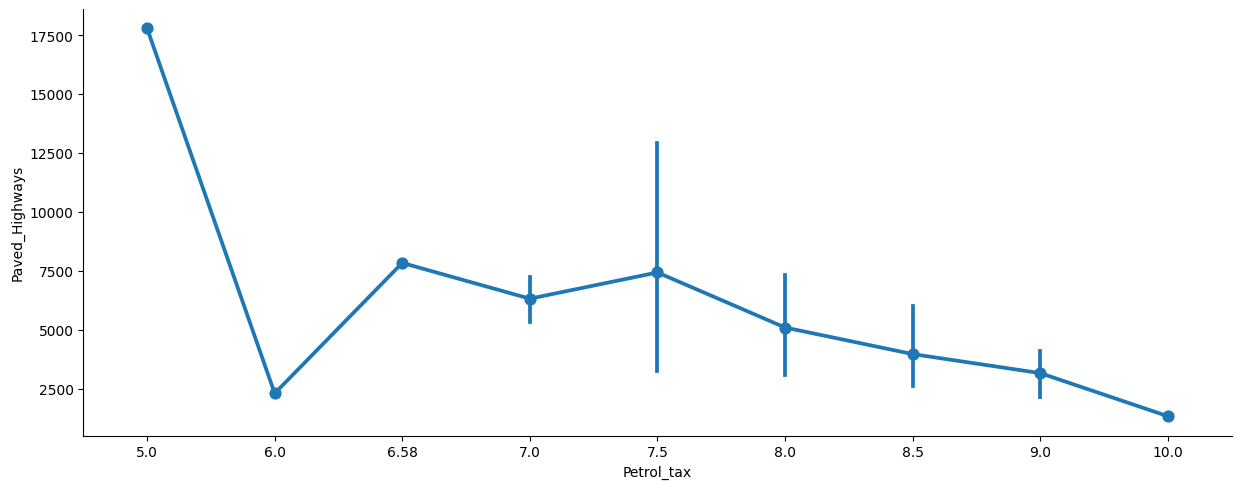

In [18]:
axes = sns.catplot(x='Petrol_tax', y='Paved_Highways', data=df, kind='point', aspect=2.5)
plt.show()

In [19]:
df.columns


Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [20]:
x=df[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y=df['Petrol_Consumption']

In [21]:
x.shape

(48, 4)

In [22]:
y.shape

(48,)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_test,y_test,x_train,y_train=train_test_split(x,y,test_size=0.30,random_state=123)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=123)

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
tree = DecisionTreeRegressor(max_depth=4,max_features=4)

In [29]:
tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, max_features=4)

In [30]:
predictions=tree.predict(x_test)

In [31]:
df=pd.DataFrame({'Actual':y_test,'predicted':predictions})
df.head(5)

,Actual,predicted
18,865,709.0000
13,508,709.0000
26,577,585.0000
31,554,709.0000
10,580,428.0000


In [32]:
from sklearn import metrics
print('Mean Absoulte Error:',metrics.mean_absolute_error(y_test,predictions))

Mean Absoulte Error: 106.73333333333333


##### print('Mean square Error:',metrics.mean_squared_error(y_test,predictions))

In [33]:
print('Root Mean square Error:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Root Mean square Error: 135.89084344919394


In [34]:
print("r2_score:",metrics.r2_score(y_test,predictions))

r2_score: 0.20106927964521037


In [35]:
tree.feature_importances_
pd.Series(tree.feature_importances_,index=x.columns).sort_values(ascending=False)

Petrol_tax                     0.3989
Average_income                 0.2274
Paved_Highways                 0.2028
Population_Driver_licence(%)   0.1709
dtype: float64